In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("Customer_Subscription_And_Transaction_Details.csv")

In [3]:
df.head(5)

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
3,3,REDUCTION,2022-02-01,BASIC,53,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18106 entries, 0 to 18105
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cust_id             18106 non-null  int64 
 1   transaction_type    18106 non-null  object
 2   transaction_date    18106 non-null  object
 3   subscription_type   18106 non-null  object
 4   subscription_price  18106 non-null  int64 
 5   customer_gender     18106 non-null  object
 6   age_group           18106 non-null  object
 7   customer_country    18106 non-null  object
 8   referral_type       18106 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [5]:
#Making sure that there is no more null values in the dataset
df.isnull().sum()

cust_id               0
transaction_type      0
transaction_date      0
subscription_type     0
subscription_price    0
customer_gender       0
age_group             0
customer_country      0
referral_type         0
dtype: int64

In [6]:
#Checking that all the errors that were in the previous dataset are now rectified
columns = ["transaction_type", "subscription_type", "customer_gender", "age_group", "customer_country", "referral_type"]
for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values in the column {col} are \n {unique_values} ")

Unique values in the column transaction_type are 
 ['initial' 'REDUCTION' 'CHURN' 'UPGRADE'] 
Unique values in the column subscription_type are 
 ['BASIC' 'MAX' 'PRO'] 
Unique values in the column customer_gender are 
 ['Male' 'Female' 'Other'] 
Unique values in the column age_group are 
 ['35-44' '18-24' '25-34' '55-65' '45-54'] 
Unique values in the column customer_country are 
 ['Denmark' 'Norway' 'Sweden' 'Finland'] 
Unique values in the column referral_type are 
 ['Google Ads' 'facebook' 'Display' 'Organic Search' 'Unknown' 'Bing'
 'Paid Search' 'TV'] 


In [7]:
# Replacing "initial" with "INITIAL" in the dataset
df.transaction_type.replace("initial","INITIAL",inplace=True)

###### The primary objective of this analysis is to enhance company performance through a comprehensive examination of the provided dataset. To achieve this, we will prioritize the evaluation of three crucial aspects during our analysis.
<ul>
    <li><b>Evaluate the current performance of the company<b></li>
    <li><b>Conduct a thorough analysis of the customer base<b></li>
    <li><b>Identify potential strategies to improve the overall performance<b></li>
</ul>

### An assessment of the current performance of the company

###### Financial performance of the company over the last three years

In [8]:
#Converting the column “transactio_date” to a datetime object
df['transaction_date'] =  pd.to_datetime(df['transaction_date'])

In [9]:
# Checking the time perid of the data we are having
strat_date = min(df['transaction_date']).strftime('%Y-%m-%d')
end_date = max(df['transaction_date']).strftime('%Y-%m-%d')
print(f"We have the data from {strat_date} to {end_date}")

We have the data from 2020-01-01 to 2022-12-01


Here, I am going to analyze the financial performance of the company over the past three years, using data from 2020-01-01 to 2022-12-01. The analysis will be conducted on a quarterly basis, focusing on three key areas. Firstly, an assessment will be made of the revenue generated from new customer acquisitions and upgrades of existing plans. Secondly, a review of quarterly losses will be conducted, analyzing the impact of customer cancellations and downgrades. Finally, the net profit of the company in each quarter will be computed to evaluate the overall financial performance of the company over the last three years.

In [10]:
# group data by year and quarter
grouped = df.groupby([pd.Grouper(key='transaction_date', freq='Q')])
# calculate the total subscription price per quarter and subscription type
mrr_income = grouped.apply(lambda x: x.loc[x['transaction_type'].isin(['INITIAL', 'UPGRADE']), 'subscription_price'].sum())

In [11]:
#Making a list of each quarter 
quarter_list = ["2020-01-01 - 2020-03-31","2020-04-01 - 2020-06-31","2020-07-01 - 2020-09-31","2020-10-01 - 2020-12-31",
              "2021-01-01 - 2021-03-31","2021-04-01 - 2020-06-31","2021-07-01 - 2020-09-31","2021-10-01 - 2021-12-31",
              "2022-01-01 - 2021-03-31","2022-04-01 - 2020-06-31","2022-07-01 - 2020-09-31","2022-10-01 - 2022-12-31"]
#Revenue generated in each quarter
quarter_incomes = mrr_income.values

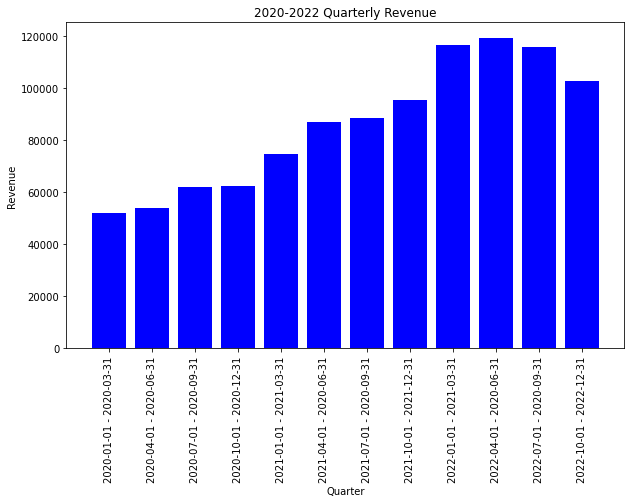

In [12]:
# create the bar plot for revenue
# setting the figure size
fig, ax = plt.subplots(figsize=(10, 6))
# ploting the data points
ax.bar(quarter_list, quarter_incomes, color='blue')
# setting the x-axis and y-axis labels and title
ax.set_title('2020-2022 Quarterly Revenue')
ax.set_ylabel('Revenue')
ax.set_xlabel('Quarter')
# rotating the x-axis labels to avoid overlapping
plt.xticks(rotation=90)
# show the plot
plt.show()

The company's revenue increased consistently from Q1 2020 to Q2 2022. However, the revenue declined in Q3 2022 and continued to decline until Q4 2022. Despite this decline, the company still generated an overall revenue increase of 123.5% over the three-year period. Further analysis would be needed to understand the reasons behind the decline in revenue in the latter part of the period and to identify potential areas for improvement.

In [13]:
# calculating the total loss in each quarter
mrr_loss = grouped.apply(lambda x: x.loc[x['transaction_type'].isin(['REDUCTION', 'CHURN']), 'subscription_price'].sum())
quarterly_loss = mrr_loss.values

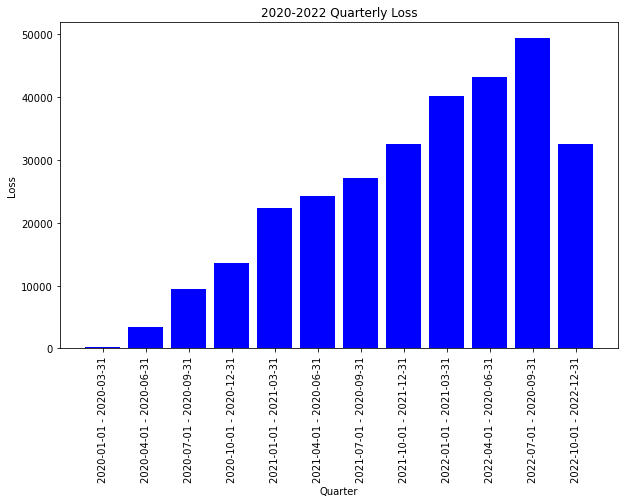

In [14]:
# creating the plot for quarterly loss
# setting the figure size
fig, ax = plt.subplots(figsize=(10, 6))
# plotting the data points
ax.bar(quarter_list, quarterly_loss, color='blue')
# setting the x-axis and y-axis labels and title
ax.set_title('2020-2022 Quarterly Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Quarter')
# rotating the x-axis labels to avoid overlapping
plt.xticks(rotation=90)
# show the plot
plt.show()

The company experienced varying levels of losses over the 12 quarters represented in the data. The main aim of this analysis is to identify potential solutions to minimize this loss.

In [15]:
#Calculating the net profit
net_profit = mrr_income.values-mrr_loss.values

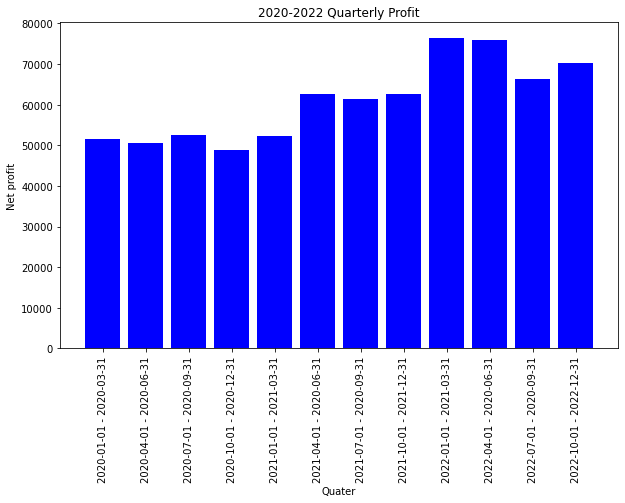

In [16]:
# creating a the plot for showing the profit
# setting the figure size
fig, ax = plt.subplots(figsize=(10, 6))
# plotting the data points
ax.bar(quarter_list, net_profit, color='blue')
# setting the x-axis and y-axis labels and title
ax.set_title('2020-2022 Quarterly Profit')
ax.set_ylabel('Net profit')
ax.set_xlabel('Quater')
# rotating the x-axis labels to avoid overlapping
plt.xticks(rotation=90)
# show the plot
plt.show()

The company's profit fluctuated throughout the 12 quarters, ranging from a low of 48,745 in Q4 2020 to a high of 76,453 in Q3 2022. Overall, the company experienced a positive trend in profit, with an average quarterly profit of approximately 61,041. The strongest quarters were Q3 and Q4 of 2021 and Q3 of 2022, which had profits above 62,000. However, the company saw a dip in profit in Q4 of 2020 and Q1 of 2021, with profits falling below 51,000. 

### Calculating the Revenue and Loss from each country

###### Revenue by Country and Year

In [17]:
#Making a copy of the original dataframe
df1 = df 
#Setting the index of the copied dataframe to "transaction_type"
df1 = df1.set_index("transaction_type")
#Select rows from the dataframe where "transaction_type" is either "INITIAL" or "UPGRADE",
#select only the columns "subscription_price", "customer_country", and "transaction_date"
df1_income = df1.loc[['INITIAL','UPGRADE'],['subscription_price','customer_country','transaction_date']]
#Resetting the index of the selected rows to default and drop the "transaction_type" column
df1_income = df1_income.reset_index(drop=True)
#Group the selected rows by year and customer_country, and calculate the sum of subscription_price for each group
grouped_income = df1_income.groupby([pd.Grouper(key='transaction_date', freq='Y'), 'customer_country'])
cou_grouped_income = grouped_income['subscription_price'].sum()
#output
cou_grouped_income

transaction_date  customer_country
2020-12-31        Denmark              47462
                  Finland              46222
                  Norway               46240
                  Sweden               90206
2021-12-31        Denmark              68931
                  Finland              59990
                  Norway               71325
                  Sweden              144971
2022-12-31        Denmark              90574
                  Finland              80872
                  Norway               97677
                  Sweden              185168
Name: subscription_price, dtype: int64

From the data, we can see that Sweden consistently generates the highest revenue, followed by Norway, Finland, and Denmark. 

###### Loss by Country and Year

In [18]:
#Select rows from the dataframe where "transaction_type" is either 'REDUCTION','CHURN'
#select only the columns "subscription_price", "customer_country", and "transaction_date"
df1_loss = df1.loc[['REDUCTION','CHURN'],['subscription_price','customer_country','transaction_date']]
#Resetting the index of the selected rows to default and drop the "transaction_type" column
df1_loss = df1_loss.reset_index(drop=True)
#Group the selected rows by year and customer_country, and calculate the sum of subscription_price for each group
grouped_loss = df1_loss.groupby([pd.Grouper(key='transaction_date', freq='Y'), 'customer_country'])
cou_grouped_loss = grouped_loss['subscription_price'].sum()
cou_grouped_loss

transaction_date  customer_country
2020-12-31        Denmark              6907
                  Finland              8786
                  Norway               3432
                  Sweden               7651
2021-12-31        Denmark             27215
                  Finland             30454
                  Norway              13729
                  Sweden              34808
2022-12-31        Denmark             43487
                  Finland             41387
                  Norway              23795
                  Sweden              56619
Name: subscription_price, dtype: int64

The report also shows that Sweden generated the highest total loss over the three years, followed by Finland, Denmark, and Norway.

###### Number of new customers subscribed each year

In [19]:
# Select rows from the original dataframe where "transaction_type" is "INITIAL"
# and only keep the columns "customer_country" and "transaction_date"
df1_initial = df1.loc[['INITIAL'],['customer_country','transaction_date']]
# Reset the index of the selected rows to default and drop the "transaction_type" column
df1_initial = df1_initial.reset_index(drop=True)
# Group the selected rows by year, based on the "transaction_date" column
df1_initial = df1_initial.groupby([pd.Grouper(key='transaction_date', freq='Y')])
# Calculate the number of new customers in each year
df1_initial_data = df1_initial['customer_country'].count()
# Return the resulting data as output
df1_initial_data

transaction_date
2020-12-31    3493
2021-12-31    3430
2022-12-31    3443
Freq: A-DEC, Name: customer_country, dtype: int64

###### The annual number of Upgredation

In [20]:
# Select rows from the original dataframe where "transaction_type" is 'UPGRADE'
# and only keep the columns "customer_country" and "transaction_date"
df1_upgrade = df1.loc[['UPGRADE'],['customer_country','transaction_date']]
# Reset the index of the selected rows to default and drop the "transaction_type" column
df1_upgrade = df1_upgrade.reset_index(drop=True)
# Group the selected rows by year, based on the "transaction_date" column
df1_upgrade = df1_upgrade.groupby([pd.Grouper(key='transaction_date', freq='Y')])
# Calculate the number of upgraded customer 
df1_upgrade_data = df1_upgrade['customer_country'].count()
df1_upgrade_data

transaction_date
2020-12-31     289
2021-12-31    1079
2022-12-31    1638
Freq: A-DEC, Name: customer_country, dtype: int64

###### The annual number of Reduction

In [21]:
# Select rows from the original dataframe where "transaction_type" is 'REDUCTION'
# and only keep the columns "customer_country" and "transaction_date"
df1_reduced = df1.loc[['REDUCTION'],['customer_country','transaction_date']]
# Reset the index of the selected rows to default and drop the "transaction_type" column
df1_reduced = df1_reduced.reset_index(drop=True)
# Group the selected rows by year, based on the "transaction_date" column
df1_reduced = df1_reduced.groupby([pd.Grouper(key='transaction_date', freq='Y')])
# Calculate the number of reduced customer 
df1_reduced_data = df1_reduced['customer_country'].count()
df1_reduced_data

transaction_date
2020-12-31     239
2021-12-31     913
2022-12-31    1387
Freq: A-DEC, Name: customer_country, dtype: int64

###### The annual number of cancellations

In [22]:
# Select rows from the original dataframe where "transaction_type" is 'CHURN'
# and only keep the columns "customer_country" and "transaction_date"
df1_cancelled = df1.loc[['CHURN'],['customer_country','transaction_date']]
# Reset the index of the selected rows to default and drop the "transaction_type" column
df1_cancelled = df1_cancelled.reset_index(drop=True)
# Group the selected rows by year, based on the "transaction_date" column
df1_cancelled = df1_cancelled.groupby([pd.Grouper(key='transaction_date', freq='Y')])
# Calculate the number of reduced customer 
df1_cancelled_data = df1_cancelled['customer_country'].count()
df1_cancelled_data

transaction_date
2020-12-31    309
2021-12-31    905
2022-12-31    981
Freq: A-DEC, Name: customer_country, dtype: int64

From this report, we can see that the number of new customers added each year remained relatively stable, with approximately 3,400-3,500 new customers per year. However, we can also see that the number of upgrades, reduction and cancellation increased significantly from 2020 to 2022,

Here, I conducted a preliminary analysis of the company's performance based on the available data. The analysis focused on the financial performance of the company, with a particular emphasis on customer acquisition and retention. Specifically, I examined the company's ability to attract new customers and encourage existing customers to upgrade to higher plans. Based on my analysis, I identified two main challenges facing the company: customers downgrading to lower plans and customers canceling their subscriptions. While the available data provides some insights into these issues, a more detailed analysis will be carried out in the third section to fully understand the underlying trends and factors driving these changes.

### Customer Analysis and Marketing Strategy Evaluation for Improved Company Performance

As a professional data analyst, the second part of the analysis would involve delving deeper into the company's customer base and the effectiveness of its current marketing strategies. This phase of the analysis is crucial because a comprehensive understanding of the customer base can help identify potential customers and enhance the company's performance.
To begin with,I would first examine the customer demographics, such as age, gender, location, and other relevant characteristics. This information would help identify the target market and enable the company to tailor its marketing strategies to meet their specific needs and preferences.The next step is to assess the effectiveness of the company's marketing strategies. This would include reviewing advertising campaigns.

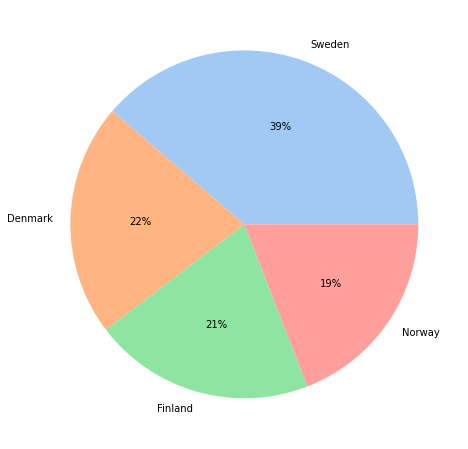

In [23]:
# Copying the original dataframe into a new dataframe named df3
df3 = df 
# Counting the number of customers in each country and store the result in the variable country_counts
country_counts = df3.customer_country.value_counts()
# Creating a color palette with pastel colors for the pie chart
colors = sns.color_palette('pastel')[0:5]
#Setting the figure size
fig = plt.figure(figsize=(8, 8))
# Creating a pie chart with the customer counts for each country as the values
plt.pie(country_counts.values, labels = country_counts.index, colors = colors, autopct='%.0f%%')
plt.show()

From the above data, it is evident that Sweden has the highest number of customers, followed by Denmark, Finland, and Norway.
This information is crucial for the company's marketing team to plan their marketing strategies and target potential customers.
The marketing team can use this data to tailor their promotions and marketing strategies specific to each country.
Furthermore, this data can also help the company identify any trends or patterns in customer behavior across different countries. For example, if the company notices a significant increase in sales from a particular country, they can investigate why this is happening and try to replicate this success in other countries. Therefore here the company can investigate the reason why the company is performing well in Sweden and can use this strategy to improve its performance in other countries also.

### Sweden

In [24]:
# Setting the index of the dataframe to 'customer_country' to make it easier to select data by country
df3 = df3.set_index("customer_country")
# Selectting a subset of data from the dataframe that corresponds to customers from Sweden and includes specific columns
df_sweden = df3.loc[['Sweden'],['transaction_type','subscription_type','customer_gender','age_group','referral_type']]

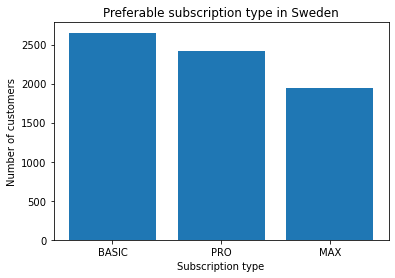

In [25]:
#Creating a bar plot for the "subscription_type" column
subscription_type_counts = df_sweden.subscription_type.value_counts()
plt.bar(subscription_type_counts.index, subscription_type_counts.values)
plt.title("Preferable subscription type in Sweden")
plt.xlabel("Subscription type")
plt.ylabel("Number of customers")
plt.show()

In [26]:
subscription_type_counts

BASIC    2651
PRO      2418
MAX      1940
Name: subscription_type, dtype: int64

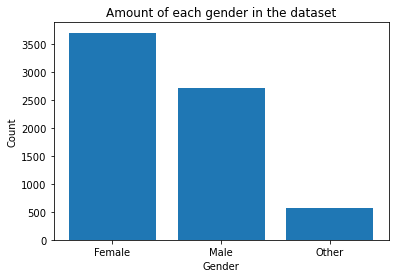

In [27]:
#Creating a bar plot for the "customer_gender" column
customer_gender_counts = df_sweden.customer_gender.value_counts()
plt.bar(customer_gender_counts.index, customer_gender_counts.values)
plt.title("Amount of each gender in the dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [28]:
customer_gender_counts

Female    3711
Male      2729
Other      569
Name: customer_gender, dtype: int64

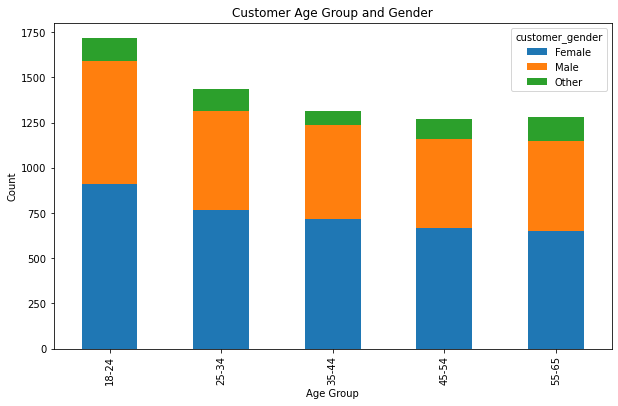

In [29]:
# group the data by age group and gender, and count the number of customers in each group
grouped = df_sweden.groupby(['age_group', 'customer_gender']).size().reset_index(name='count')
# pivot the data to create a matrix with age group as rows, gender as columns, and count as values
matrix = grouped.pivot(index='age_group', columns='customer_gender', values='count')
# create a stacked bar plot of the data
ax = matrix.plot(kind='bar', stacked=True, figsize=(10, 6))
# set the axis labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Customer Age Group and Gender')
# show the plot
plt.show()

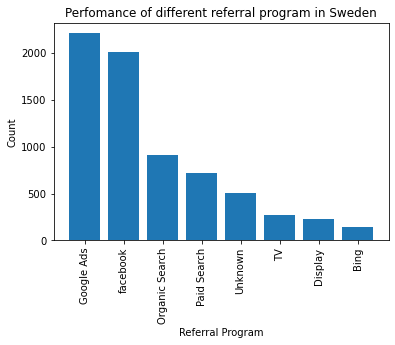

In [30]:
#creating a bar chart to reprasent the participation of customers in different referral program
referral_data_counts = df_sweden.referral_type.value_counts()
plt.bar(referral_data_counts.index, referral_data_counts.values)
plt.title("Perfomance of different referral program in Sweden")
plt.xlabel("Referral Program")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [31]:
referral_data_counts

Google Ads        2212
facebook          2012
Organic Search     917
Paid Search        716
Unknown            510
TV                 276
Display            224
Bing               142
Name: referral_type, dtype: int64

In [32]:
tranaction_type_count = df_sweden.transaction_type.value_counts()
tranaction_type_count

INITIAL      4144
UPGRADE      1269
REDUCTION    1029
CHURN         567
Name: transaction_type, dtype: int64

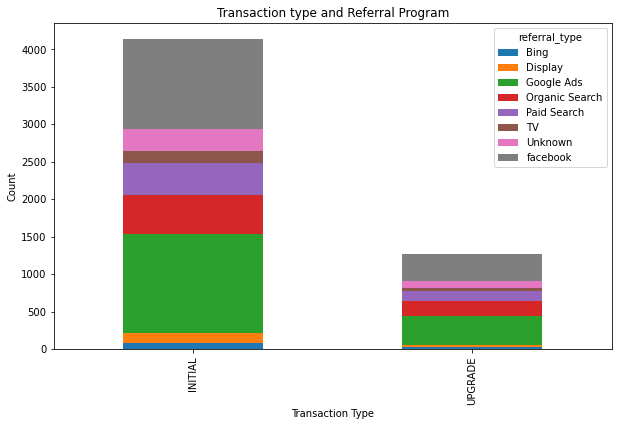

In [33]:
# filter the dataframe to include only the desired transaction types
df_filtered = df_sweden[df_sweden['transaction_type'].isin(['INITIAL', 'UPGRADE'])]
# group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_filtered.groupby(['transaction_type', 'referral_type']).size().reset_index(name='count')
# pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='transaction_type', columns='referral_type', values='count')
# create a stacked bar plot of the data
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
# set the axis labels and title
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Transaction type and Referral Program')
# show the plot
plt.show()

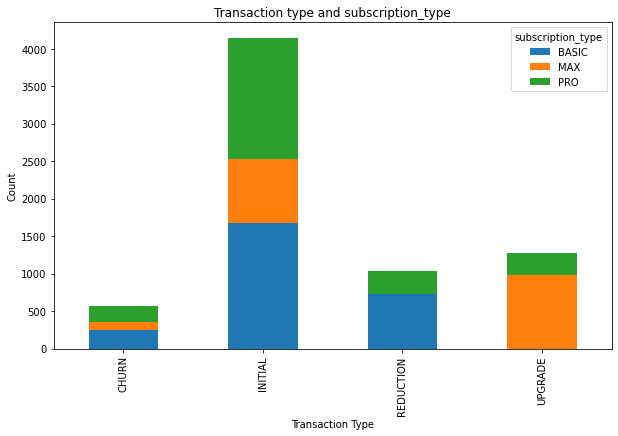

In [34]:
# group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_sweden.groupby(['transaction_type', 'subscription_type']).size().reset_index(name='count')
# pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='transaction_type', columns='subscription_type', values='count')
# create a stacked bar plot of the data
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
# set the axis labels and title
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Transaction type and subscription_type')
# show the plot
plt.show()

Overall, all the above the data shows that female customers are more prevalent than male customers in Sweden. The Basic subscription type has the highest number of customers, and Google Ads and Facebook are the most effective referral types. Companies can leverage this information to make informed decisions on marketing campaigns and product offerings to better target the customers in Sweden.

### Denmark

In [35]:
# Selectting a subset of data from the dataframe that corresponds to customers from Denmark and includes specific columns
df_denmark = df3.loc[['Denmark'],['transaction_type','subscription_type','customer_gender','age_group','referral_type']]

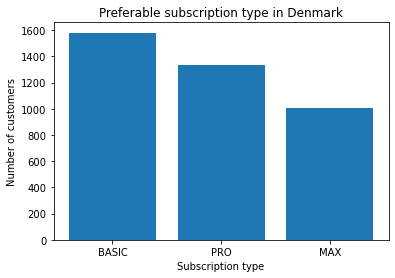

In [36]:
#Creating a bar plot for the "subscription_type" column 
#Identifying the best performing subscription type in Denmark
subscription_type_counts = df_denmark.subscription_type.value_counts()
plt.bar(subscription_type_counts.index, subscription_type_counts.values)
plt.title("Preferable subscription type in Denmark")
plt.xlabel("Subscription type")
plt.ylabel("Number of customers")
plt.show()

In [37]:
subscription_type_counts

BASIC    1580
PRO      1333
MAX      1009
Name: subscription_type, dtype: int64

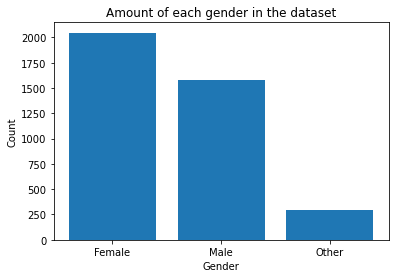

In [38]:
#Creating a bar plot for the "customer_gender" column
customer_gender_counts = df_denmark.customer_gender.value_counts()
plt.bar(customer_gender_counts.index, customer_gender_counts.values)
plt.title("Amount of each gender in the dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [39]:
customer_gender_counts

Female    2046
Male      1580
Other      296
Name: customer_gender, dtype: int64

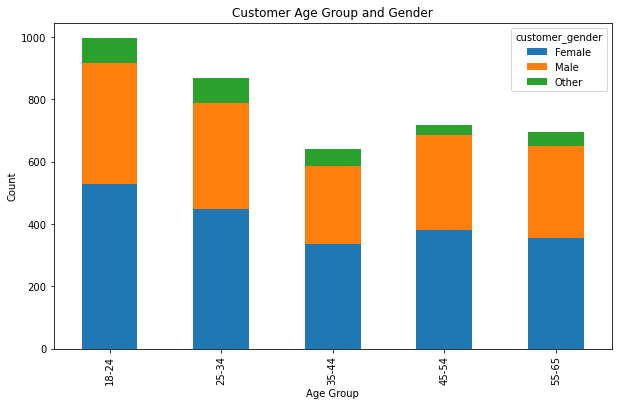

In [40]:
# group the data by age group and gender, and count the number of customers in each group
grouped = df_denmark.groupby(['age_group', 'customer_gender']).size().reset_index(name='count')
# pivot the data to create a matrix with age group as rows, gender as columns, and count as values
matrix = grouped.pivot(index='age_group', columns='customer_gender', values='count')
# create a stacked bar plot of the data
ax = matrix.plot(kind='bar', stacked=True, figsize=(10, 6))
# set the axis labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Customer Age Group and Gender')
# show the plot
plt.show()

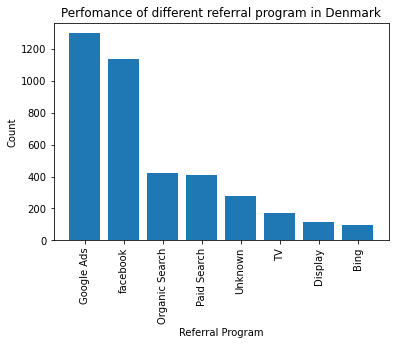

In [41]:
#creating a bar chart to reprasent the participation of customers in different referral program
referral_data_counts = df_denmark.referral_type.value_counts()
plt.bar(referral_data_counts.index, referral_data_counts.values)
plt.title("Perfomance of different referral program in Denmark")
plt.xlabel("Referral Program")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [42]:
referral_data_counts

Google Ads        1296
facebook          1136
Organic Search     424
Paid Search        411
Unknown            275
TV                 169
Display            115
Bing                96
Name: referral_type, dtype: int64

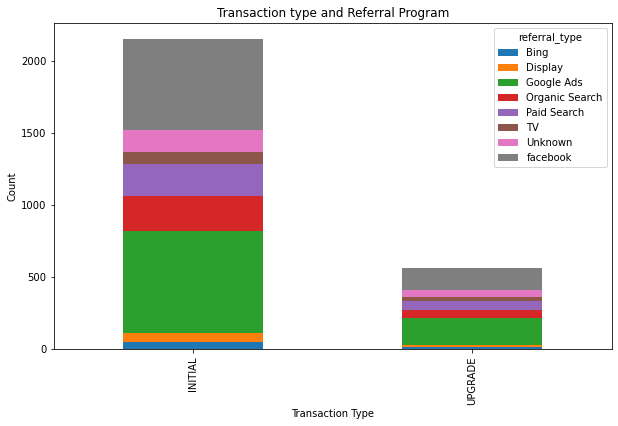

In [43]:
# filter the dataframe to include only the desired transaction types
df_filtered = df_denmark[df_denmark['transaction_type'].isin(['INITIAL', 'UPGRADE'])]
# group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_filtered.groupby(['transaction_type', 'referral_type']).size().reset_index(name='count')
# pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='transaction_type', columns='referral_type', values='count')
# create a stacked bar plot of the data
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Transaction type and Referral Program')
plt.show()

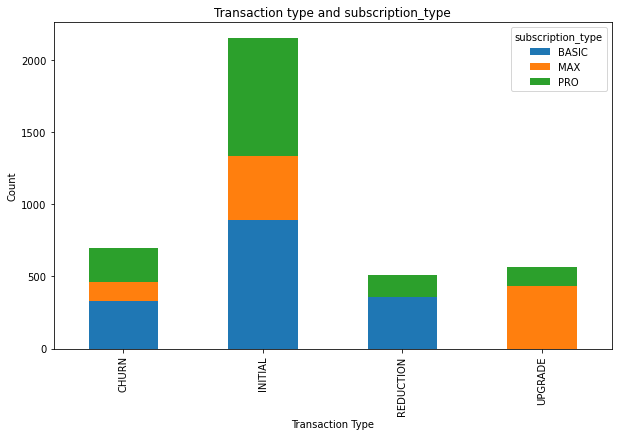

In [44]:
# group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_denmark.groupby(['transaction_type', 'subscription_type']).size().reset_index(name='count')
# pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='transaction_type', columns='subscription_type', values='count')
# create a stacked bar plot of the data
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Transaction type and subscription_type')
plt.show()

The analysis of the data shows in Denmark also that the company's Basic subscription plan is more popular among customers, and the Pro plan is also doing well. The company has a larger female customer base, and the majority of customers were acquired through Google Ads and Facebook. 

### Norway

In [45]:
# Selectting a subset of data from the dataframe that corresponds to customers from Norway and includes specific columns
df_norway= df3.loc[['Norway'],['transaction_type','subscription_type','customer_gender','age_group','referral_type']]

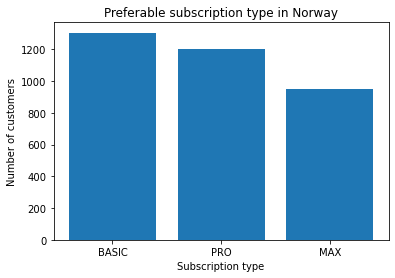

In [46]:
#Creating a bar plot for the "subscription_type" column
subscription_type_counts = df_norway.subscription_type.value_counts()
plt.bar(subscription_type_counts.index, subscription_type_counts.values)
plt.title("Preferable subscription type in Norway")
plt.xlabel("Subscription type")
plt.ylabel("Number of customers")
plt.show()

In [47]:
subscription_type_counts

BASIC    1305
PRO      1201
MAX       952
Name: subscription_type, dtype: int64

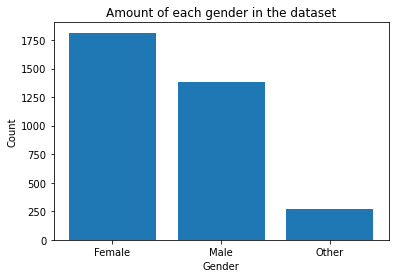

In [48]:
#Creating a bar plot for the "customer_gender" column
customer_gender_counts = df_norway.customer_gender.value_counts()
plt.bar(customer_gender_counts.index, customer_gender_counts.values)
plt.title("Amount of each gender in the dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [49]:
customer_gender_counts

Female    1814
Male      1378
Other      266
Name: customer_gender, dtype: int64

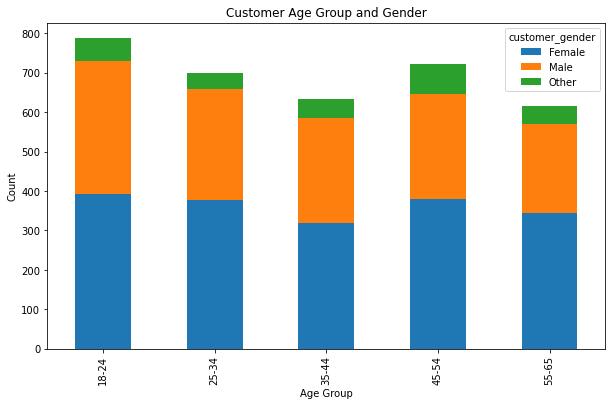

In [50]:
# group the data by age group and gender, and count the number of customers in each group
grouped = df_norway.groupby(['age_group', 'customer_gender']).size().reset_index(name='count')
# pivot the data to create a matrix with age group as rows, gender as columns, and count as values
matrix = grouped.pivot(index='age_group', columns='customer_gender', values='count')
ax = matrix.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Customer Age Group and Gender')
plt.show()

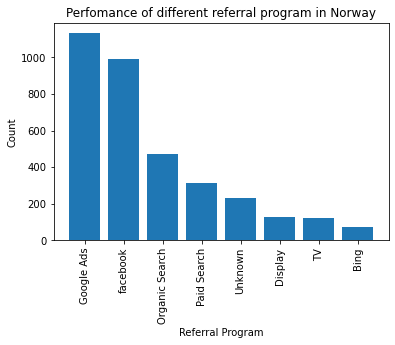

In [51]:
#creating a bar chart to reprasent the participation of customers in different referral program
referral_data_counts = df_norway.referral_type.value_counts()
plt.bar(referral_data_counts.index, referral_data_counts.values)
plt.title("Perfomance of different referral program in Norway")
plt.xlabel("Referral Program")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [52]:
referral_data_counts

Google Ads        1131
facebook           992
Organic Search     472
Paid Search        313
Unknown            229
Display            128
TV                 122
Bing                71
Name: referral_type, dtype: int64

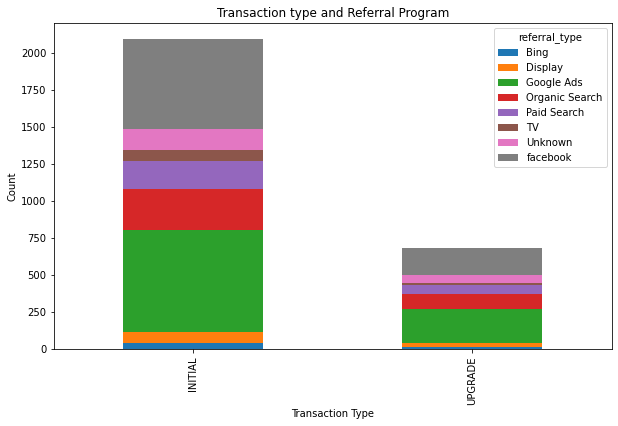

In [53]:
# filter the dataframe to include only the desired transaction types
df_filtered = df_norway[df_norway['transaction_type'].isin(['INITIAL', 'UPGRADE'])]
# group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_filtered.groupby(['transaction_type', 'referral_type']).size().reset_index(name='count')
# pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='transaction_type', columns='referral_type', values='count')
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Transaction type and Referral Program')
plt.show()

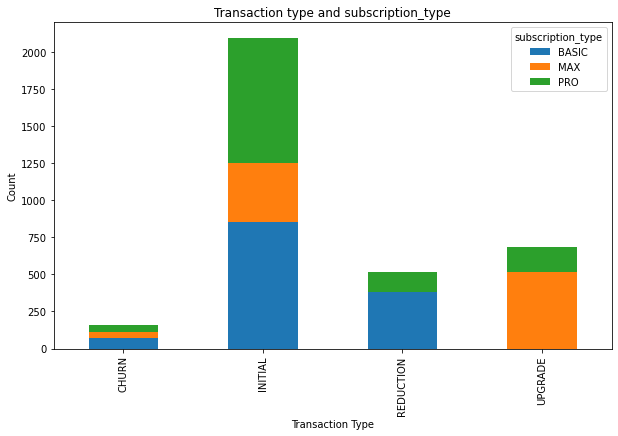

In [54]:
#group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_norway.groupby(['transaction_type', 'subscription_type']).size().reset_index(name='count')
#pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='transaction_type', columns='subscription_type', values='count')
#create a stacked bar plot of the data
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Transaction type and subscription_type')
plt.show()

### Finland

In [55]:
# Selectting a subset of data from the dataframe that corresponds to customers from Finland and includes specific columns
df_finland= df3.loc[['Finland'],['transaction_type','subscription_type','customer_gender','age_group','referral_type']]

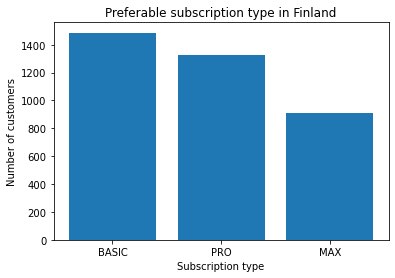

In [56]:
#Creating a bar plot for the "subscription_type" column
subscription_type_counts = df_finland.subscription_type.value_counts()
plt.bar(subscription_type_counts.index, subscription_type_counts.values)
plt.title("Preferable subscription type in Finland")
plt.xlabel("Subscription type")
plt.ylabel("Number of customers")
plt.show()

In [57]:
subscription_type_counts

BASIC    1486
PRO      1324
MAX       907
Name: subscription_type, dtype: int64

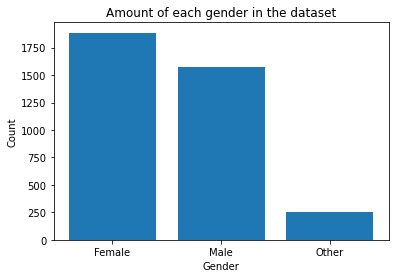

In [58]:
#Creating a bar plot for the "customer_gender" column
customer_gender_counts = df_finland.customer_gender.value_counts()
plt.bar(customer_gender_counts.index, customer_gender_counts.values)
plt.title("Amount of each gender in the dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [59]:
customer_gender_counts

Female    1886
Male      1578
Other      253
Name: customer_gender, dtype: int64

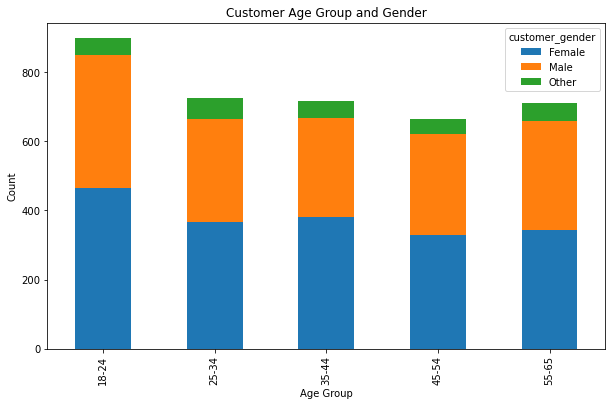

In [60]:
# group the data by age group and gender, and count the number of customers in each group
grouped = df_finland.groupby(['age_group', 'customer_gender']).size().reset_index(name='count')
# pivot the data to create a matrix with age group as rows, gender as columns, and count as values
matrix = grouped.pivot(index='age_group', columns='customer_gender', values='count')
# create a stacked bar plot of the data
ax = matrix.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Customer Age Group and Gender')
plt.show()

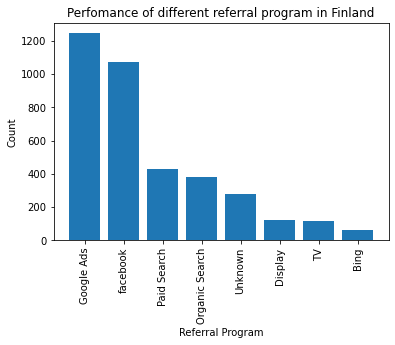

In [61]:
#creating a bar chart to reprasent the participation of customers in different referral program
referral_data_counts = df_finland.referral_type.value_counts()
plt.bar(referral_data_counts.index, referral_data_counts.values)
plt.title("Perfomance of different referral program in Finland")
plt.xlabel("Referral Program")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

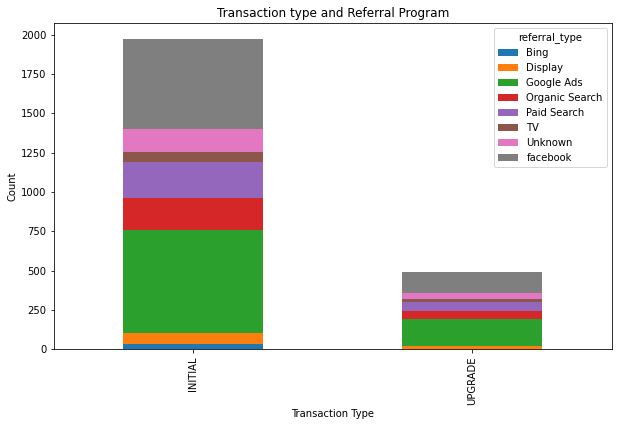

In [62]:
# filter the dataframe to include only the desired transaction types
df_filtered = df_finland[df_finland['transaction_type'].isin(['INITIAL', 'UPGRADE'])]
# group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_filtered.groupby(['transaction_type', 'referral_type']).size().reset_index(name='count')
# pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='transaction_type', columns='referral_type', values='count')
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Transaction type and Referral Program')
# show the plot
plt.show()

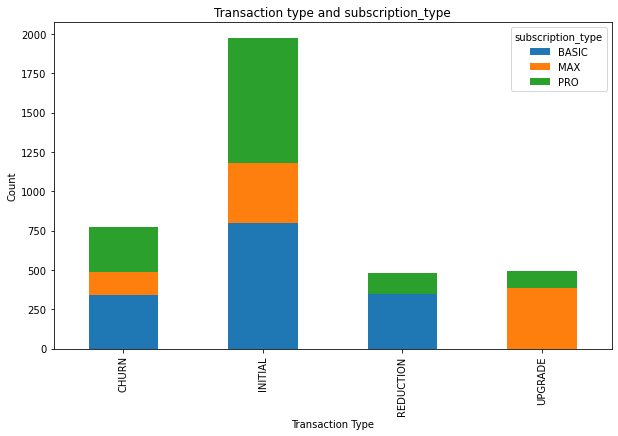

In [63]:
# group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_finland.groupby(['transaction_type', 'subscription_type']).size().reset_index(name='count')
# pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='transaction_type', columns='subscription_type', values='count')
# create a stacked bar plot of the data
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count')
ax.set_title('Transaction type and subscription_type')
plt.show()

Based on the analysis of the customer data across the four countries, it is evident that there is a clear preference for the basic subscription plan. This indicates that customers in all four countries are looking for a more cost-effective option that meets their basic needs. Additionally, the data also shows that the majority of customers in all four countries are females, which provides a clear target audience for the company's marketing efforts.
However, it is also important to note that the gap between the number of female and male customers is not very high. This suggests that the company should not solely focus on female customers, but also consider targeting males to attract a more diverse customer base. By targeting both categories, the company can maximize its potential customer base and increase its overall revenue.

### what strategies can be implemented to enhance the company's performance?

The performance of the company can be improved mainly by 3 methods
<ul>
    <li>Reducing the unnecessary operational cost</li>
    <li>Retaining current customers by improving churn rate/reducing churn</li>
    <li>Increasing the customer base</li>
</ul>

###### How to reduce unnecessary costs?<br> 
By analyzing the data, we can identify the marketing channels that are generating the most value for your company. By reallocating company's budget to these high-performing channels, we can ensure that you are getting the best possible return on investment. Additionally, it is important to identify the channels that are not producing any value to your company and stop using them altogether. This way, you can eliminate unnecessary costs and focus your efforts on the channels that are most effective in driving business growth. 

### Performance of different marketting channels over the 3 years

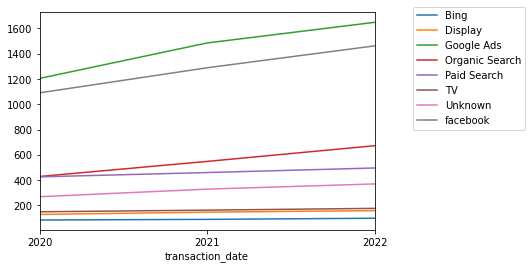

In [64]:
df_per = df1
# Select rows with INITIAL and UPGRADE values in 'Transaction Type' 
df_per = df_per.loc[['INITIAL','UPGRADE'],["transaction_date","cust_id","referral_type"]]
# Group the selected data by year and referral type and count the number of customer IDs for each group
df_per = df_per.groupby([pd.Grouper(key='transaction_date', freq='Y'), 'referral_type']).count()['cust_id'].unstack()
ax = df_per.plot(kind='line')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### Finding the best referral program for particular age group

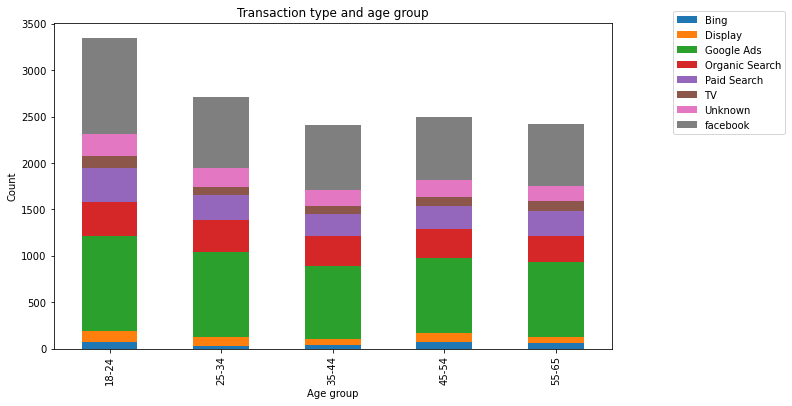

In [65]:
# filter the dataframe to include only the desired transaction types
df_filtered = df[df['transaction_type'].isin(['INITIAL', 'UPGRADE'])]
# group the data by transaction type and referral type, and count the number of customers in each group
grouped_type = df_filtered.groupby(['age_group', 'referral_type']).size().reset_index(name='count')
# pivot the data to create a matrix with transaction type as rows, referral type as columns, and count as values
matrix_type = grouped_type.pivot(index='age_group', columns='referral_type', values='count')
# create a stacked bar plot of the data
ax = matrix_type.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Age group')
ax.set_ylabel('Count')
ax.set_title('Transaction type and age group')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### Subscription cancellations over the last 3-year period

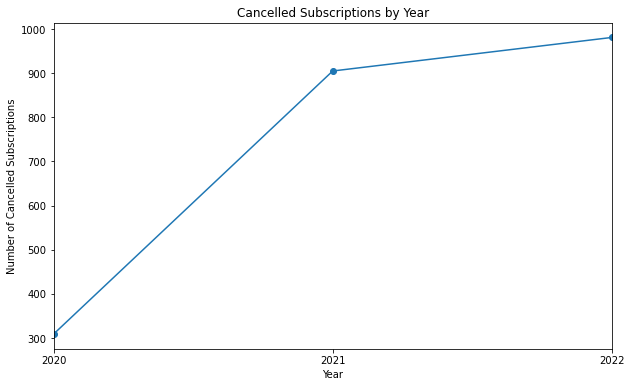

In [66]:
df5 = df1
df5_yearly = df5.loc[['CHURN']].groupby([pd.Grouper(key='transaction_date', freq='Y')]).count()
# create the plot
df5_yearly.plot(kind='line', y='subscription_type', figsize=(10, 6), marker='o', legend = False)
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cancelled Subscriptions')
plt.title('Cancelled Subscriptions by Year')
# show the plot
plt.show()

###  Over the last 3 years, the number of cancellations by country

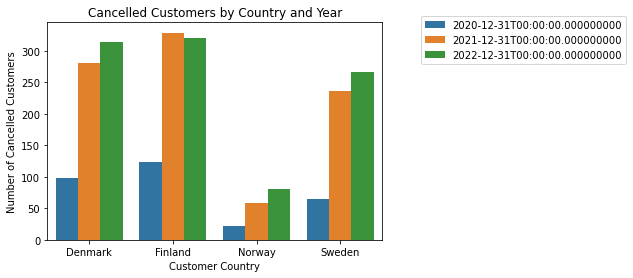

In [67]:
df5 = df5.loc[['CHURN'], ['customer_country', 'transaction_date']]
# group the data by country and year, and count the number of cancelled customers in each group
grouped_churn = df5.groupby(['customer_country', pd.Grouper(key='transaction_date', freq='Y')]).size().reset_index(name='count')
# create a bar plot for country column, with year as hue
ax = sns.barplot(x='customer_country', y='count', hue='transaction_date', data=grouped_churn)
# set the axis labels and title
ax.set_ylabel('Number of Cancelled Customers')
ax.set_xlabel('Customer Country')
ax.set_title('Cancelled Customers by Country and Year')
ax.legend(bbox_to_anchor=(1.1, 1.05))
# show the plot
plt.show()